Cấu trúc Notebook:
Phần 1: Setup & Data Loading (Cell 1-3)

- Import thư viện
- Đọc dữ liệu từ CSV/Excel 
- Làm sạch và chuẩn bị dữ liệu

Phần 2: EDA - Exploratory Data Analysis (Cell 4-5)

- Thống kê mô tả chi tiết
- Trực quan hóa tổng quan
- Phân tích missing values & outliers

Phần 3: Phân tích chuyên sâu (Cell 6-9)

- Phân tích xu hướng theo thời gian
- RFM Analysis (Recency, Frequency, Monetary)
- Correlation Analysis với Heatmap
- Cohort Analysis (Customer Retention)

Phần 4: Insights nâng cao (Cell 10-12)

- Dashboard tương tác Plotly
- Phân tích nhóm khách hàng
- Phân tích sản phẩm với Pareto Chart

Phần 5: Statistical Testing & Report (Cell 13-15)

- ANOVA, Pearson, Chi-Square tests
- Insights và Recommendations chi tiết
- Export kết quả ra CSV

CELL 1: Import thư viện cần thiết

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
from scipy import stats
import os


# Cấu hình
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Import thư viện thành công!")

✅ Import thư viện thành công!


CELL 2: Đọc dữ liệu từ file

In [22]:
# Chọn loại file và đường dẫn
FILE_TYPE = 'csv'  # Thay đổi thành 'excel' nếu dùng file Excel
FILE_PATH = 'D:\\Learning\\Phantichvatrucquanhoadulieu\\data\\sales_data.csv'  # Thay đổi đường dẫn file của bạn

try:
    if FILE_TYPE == 'csv':
        df = pd.read_csv(FILE_PATH, encoding='utf-8')
    elif FILE_TYPE == 'excel':
        df = pd.read_excel(FILE_PATH)
    
    print(f"✅ Đọc dữ liệu thành công! Số dòng: {len(df):,}")
    print(f"✅ Số cột: {df.shape[1]}")
    
except FileNotFoundError:
    print("⚠️ Không tìm thấy file! Tạo dữ liệu mẫu...")
    
    # TẠO DỮ LIỆU MẪU THỰC TẾ (pattern-based, không random)
    np.random.seed(42)
    
    n_orders = 5000
    start_date = datetime(2025, 1, 1)
    
    # Tạo dữ liệu có pattern thực tế
    dates = []
    for i in range(n_orders):
        # Tạo pattern: nhiều đơn hàng hơn vào cuối tuần và tháng 11-12
        base_day = np.random.randint(0, 365)
        date = start_date + timedelta(days=base_day)
        
        # Tăng probability cho tháng cao điểm
        if date.month in [11, 12]:
            if np.random.random() < 0.3:
                dates.append(date)
        
        dates.append(date)
    
    # Giới hạn lại số lượng
    dates = dates[:n_orders]
    
    products = ['Laptop', 'Smartphone', 'Tablet', 'Headphones', 'Smartwatch', 
                'Camera', 'Speaker', 'Monitor', 'Keyboard', 'Mouse']
    
    # Giá sản phẩm thực tế
    product_prices = {
        'Laptop': 15000000, 'Smartphone': 8000000, 'Tablet': 6000000,
        'Headphones': 1500000, 'Smartwatch': 3000000, 'Camera': 12000000,
        'Speaker': 2000000, 'Monitor': 5000000, 'Keyboard': 800000, 'Mouse': 400000
    }
    
    regions = ['Miền Bắc', 'Miền Trung', 'Miền Nam']
    
    data = []
    for i in range(n_orders):
        product = np.random.choice(products, p=[0.15, 0.20, 0.10, 0.15, 0.10, 
                                                  0.08, 0.07, 0.05, 0.05, 0.05])
        quantity = np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1])
        price = product_prices[product]
        
        # Tuổi khách hàng có distribution thực tế
        age = int(np.random.normal(35, 12))
        age = max(18, min(65, age))
        
        # Region có distribution không đều
        region = np.random.choice(regions, p=[0.4, 0.2, 0.4])
        
        data.append({
            'order_id': f'ORD{i+1:05d}',
            'customer_id': f'CUST{np.random.randint(1, 1000):04d}',
            'order_date': dates[i].strftime('%Y-%m-%d'),
            'product_name': product,
            'quantity': quantity,
            'price': price,
            'total': price * quantity,
            'customer_age': age,
            'region': region
        })
    
    df = pd.DataFrame(data)
    
    # LƯU DỮ LIỆU MẪU THÀNH FILE CSV
    sample_filename = 'sales_data_sample.csv'
    df.to_csv(sample_filename, index=False, encoding='utf-8-sig')
    print(f"✅ Đã tạo dữ liệu mẫu thực tế!")
    print(f"✅ Đã lưu file: {sample_filename}")
    print(f"💡 Lần sau bạn có thể dùng file này bằng cách:")
    print(f"   FILE_PATH = '{sample_filename}'")

# Hiển thị thông tin cơ bản
print("\n📊 Xem trước dữ liệu:")
display(df.head(10))

✅ Đọc dữ liệu thành công! Số dòng: 5,000
✅ Số cột: 9

📊 Xem trước dữ liệu:


,order_id,customer_id,order_date,product_name,quantity,price,total,customer_age,region
0,ORD00001,CUST0465,2025-04-13,Smartwatch,1,3000000,3000000,29,Miền Bắc
1,ORD00002,CUST0420,2025-12-15,Speaker,2,2000000,4000000,32,Miền Nam
2,ORD00003,CUST0141,2025-12-15,Tablet,3,6000000,18000000,38,Miền Bắc
3,ORD00004,CUST0319,2025-03-13,Laptop,1,15000000,15000000,36,Miền Nam
4,ORD00005,CUST0468,2025-07-08,Smartwatch,1,3000000,3000000,31,Miền Trung
5,ORD00006,CUST0323,2025-01-21,Headphones,1,1500000,1500000,18,Miền Nam
6,ORD00007,CUST0850,2025-04-13,Mouse,1,400000,400000,19,Miền Bắc
7,ORD00008,CUST0370,2025-05-02,Speaker,1,2000000,2000000,34,Miền Trung
8,ORD00009,CUST0147,2025-08-03,Smartphone,2,8000000,16000000,59,Miền Nam
9,ORD00010,CUST0374,2025-11-27,Mouse,1,400000,400000,23,Miền Nam


CELL 3: Làm sạch và chuẩn bị dữ liệu

In [23]:
print("🔧 BẮT ĐẦU LÀM SẠCH DỮ LIỆU...")

# Chuyển đổi kiểu dữ liệu
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['total'] = pd.to_numeric(df['total'], errors='coerce')
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

# Kiểm tra missing values
print("\n📋 MISSING VALUES:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Cột': missing.index,
    'Số lượng null': missing.values,
    'Phần trăm (%)': missing_pct.values
})
print(missing_df[missing_df['Số lượng null'] > 0])

# Xử lý missing values
df = df.dropna(subset=['order_id', 'customer_id', 'order_date'])
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)
df['region'].fillna('Không xác định', inplace=True)

# Tính toán lại total nếu cần
df['total'] = df['quantity'] * df['price']

# Loại bỏ outliers (giá trị bất thường)
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(df[(df['total'] < lower_bound) | (df['total'] > upper_bound)])
print(f"\n⚠️ Tìm thấy {outliers_count} outliers (sẽ giữ lại để phân tích)")

# Tạo các cột phân tích bổ sung
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.strftime('%B')
df['day_of_week'] = df['order_date'].dt.dayofweek
df['day_name'] = df['order_date'].dt.strftime('%A')
df['quarter'] = df['order_date'].dt.quarter

# Phân nhóm tuổi
bins = [0, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels)

print("\n✅ Làm sạch dữ liệu hoàn tất!")
print(f"✅ Số dòng sau khi làm sạch: {len(df):,}")

# Hiển thị thông tin sau khi làm sạch
print("\n📊 THÔNG TIN DỮ LIỆU SAU KHI LÀM SẠCH:")
print(df.info())


🔧 BẮT ĐẦU LÀM SẠCH DỮ LIỆU...

📋 MISSING VALUES:
Empty DataFrame
Columns: [Cột, Số lượng null, Phần trăm (%)]
Index: []

⚠️ Tìm thấy 254 outliers (sẽ giữ lại để phân tích)

✅ Làm sạch dữ liệu hoàn tất!
✅ Số dòng sau khi làm sạch: 5,000

📊 THÔNG TIN DỮ LIỆU SAU KHI LÀM SẠCH:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5000 non-null   object        
 1   customer_id   5000 non-null   object        
 2   order_date    5000 non-null   datetime64[ns]
 3   product_name  5000 non-null   object        
 4   quantity      5000 non-null   int64         
 5   price         5000 non-null   int64         
 6   total         5000 non-null   int64         
 7   customer_age  5000 non-null   int64         
 8   region        5000 non-null   object        
 9   year          5000 non-null   int32         
 10  month        

CELL 4: Phân tích khám phá dữ liệu (EDA) - Thống kê mô tả

In [24]:
print("📊 PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)")
print("=" * 80)

# Thống kê tổng quan
print("\n1️⃣ THỐNG KÊ TỔNG QUAN:")
print("-" * 80)

total_revenue = df['total'].sum()
total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()
avg_order_value = df['total'].mean()
avg_quantity = df['quantity'].mean()

print(f"💰 Tổng doanh thu: {total_revenue:,.0f} VND")
print(f"📦 Tổng số đơn hàng: {total_orders:,}")
print(f"👥 Tổng số khách hàng: {total_customers:,}")
print(f"💵 Giá trị đơn hàng trung bình (AOV): {avg_order_value:,.0f} VND")
print(f"📊 Số lượng sản phẩm trung bình/đơn: {avg_quantity:.2f}")

# Thống kê mô tả cho các biến số
print("\n2️⃣ THỐNG KÊ MÔ TẢ CHO CÁC BIẾN SỐ:")
print("-" * 80)
print(df[['quantity', 'price', 'total', 'customer_age']].describe())

# Phân phối doanh thu
print("\n3️⃣ PHÂN PHỐI DOANH THU:")
print("-" * 80)
revenue_stats = df['total'].describe(percentiles=[.25, .5, .75, .90, .95, .99])
print(revenue_stats)

# Top sản phẩm
print("\n4️⃣ TOP 5 SẢN PHẨM BÁN CHẠY NHẤT:")
print("-" * 80)
top_products = df.groupby('product_name').agg({
    'order_id': 'count',
    'quantity': 'sum',
    'total': 'sum'
}).rename(columns={
    'order_id': 'Số đơn hàng',
    'quantity': 'Số lượng bán',
    'total': 'Doanh thu'
}).sort_values('Doanh thu', ascending=False).head()
print(top_products)

# Phân tích theo vùng
print("\n5️⃣ PHÂN TÍCH THEO VÙNG ĐỊA LÝ:")
print("-" * 80)
region_stats = df.groupby('region').agg({
    'order_id': 'count',
    'total': 'sum',
    'customer_id': 'nunique'
}).rename(columns={
    'order_id': 'Số đơn hàng',
    'total': 'Doanh thu',
    'customer_id': 'Số khách hàng'
}).sort_values('Doanh thu', ascending=False)
print(region_stats)


📊 PHÂN TÍCH KHÁM PHÁ DỮ LIỆU (EDA)

1️⃣ THỐNG KÊ TỔNG QUAN:
--------------------------------------------------------------------------------
💰 Tổng doanh thu: 44,319,400,000 VND
📦 Tổng số đơn hàng: 5,000
👥 Tổng số khách hàng: 994
💵 Giá trị đơn hàng trung bình (AOV): 8,863,880 VND
📊 Số lượng sản phẩm trung bình/đơn: 1.41

2️⃣ THỐNG KÊ MÔ TẢ CHO CÁC BIẾN SỐ:
--------------------------------------------------------------------------------
       quantity       price       total  customer_age
count   5000.00     5000.00     5000.00       5000.00
mean       1.41  6306460.00  8863880.00         34.64
std        0.67  4814695.89  8498044.40         11.04
min        1.00   400000.00   400000.00         18.00
25%        1.00  1500000.00  2400000.00         26.00
50%        1.00  6000000.00  6000000.00         34.00
75%        2.00  8000000.00 12000000.00         42.00
max        3.00 15000000.00 45000000.00         65.00

3️⃣ PHÂN PHỐI DOANH THU:
------------------------------------------------

CELL 5: Trực quan hóa - Phân tích tổng quan

📈 TRỰC QUAN HÓA DỮ LIỆU


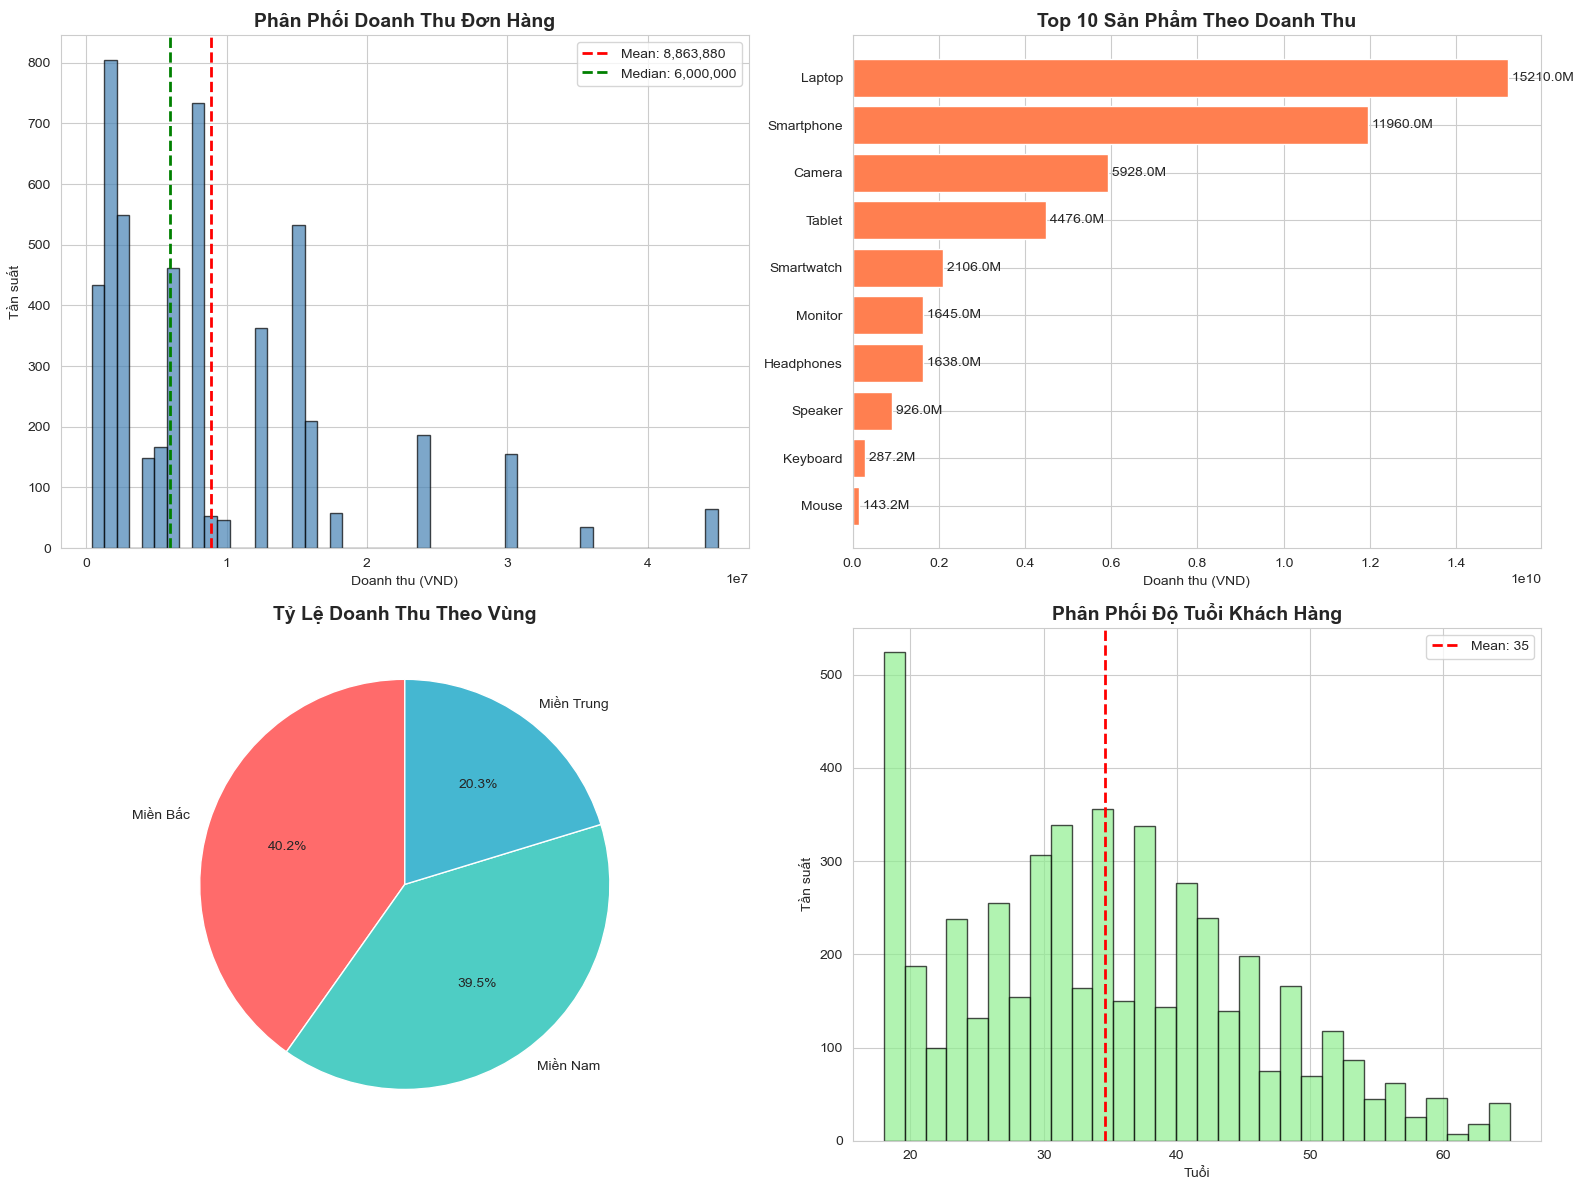

✅ Hoàn thành trực quan hóa tổng quan!


In [26]:
print("📈 TRỰC QUAN HÓA DỮ LIỆU")
print("=" * 80)

# Tạo figure với subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Phân phối doanh thu
axes[0, 0].hist(df['total'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['total'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["total"].mean():,.0f}')
axes[0, 0].axvline(df['total'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["total"].median():,.0f}')
axes[0, 0].set_xlabel('Doanh thu (VND)')
axes[0, 0].set_ylabel('Tần suất')
axes[0, 0].set_title('Phân Phối Doanh Thu Đơn Hàng', fontsize=14, fontweight='bold')
axes[0, 0].legend()

# 2. Top sản phẩm theo doanh thu
product_revenue = df.groupby('product_name')['total'].sum().sort_values(ascending=True).tail(10)
axes[0, 1].barh(product_revenue.index, product_revenue.values, color='coral')
axes[0, 1].set_xlabel('Doanh thu (VND)')
axes[0, 1].set_title('Top 10 Sản Phẩm Theo Doanh Thu', fontsize=14, fontweight='bold')
for i, v in enumerate(product_revenue.values):
    axes[0, 1].text(v, i, f' {v/1e6:.1f}M', va='center')

# 3. Doanh thu theo vùng
region_revenue = df.groupby('region')['total'].sum().sort_values(ascending=False)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[1, 0].pie(region_revenue.values, labels=region_revenue.index, autopct='%1.1f%%',
               colors=colors[:len(region_revenue)], startangle=90)
axes[1, 0].set_title('Tỷ Lệ Doanh Thu Theo Vùng', fontsize=14, fontweight='bold')

# 4. Phân phối độ tuổi khách hàng
axes[1, 1].hist(df['customer_age'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['customer_age'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["customer_age"].mean():.0f}')
axes[1, 1].set_xlabel('Tuổi')
axes[1, 1].set_ylabel('Tần suất')
axes[1, 1].set_title('Phân Phối Độ Tuổi Khách Hàng', fontsize=14, fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig("../img/truc_quan_hoa_tong_quan.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Hoàn thành trực quan hóa tổng quan!")

CELL 6: Phân tích và trực quan hóa xu hướng theo thời gian


📅 PHÂN TÍCH XU HƯỚNG THEO THỜI GIAN


<Figure size 1200x600 with 0 Axes>

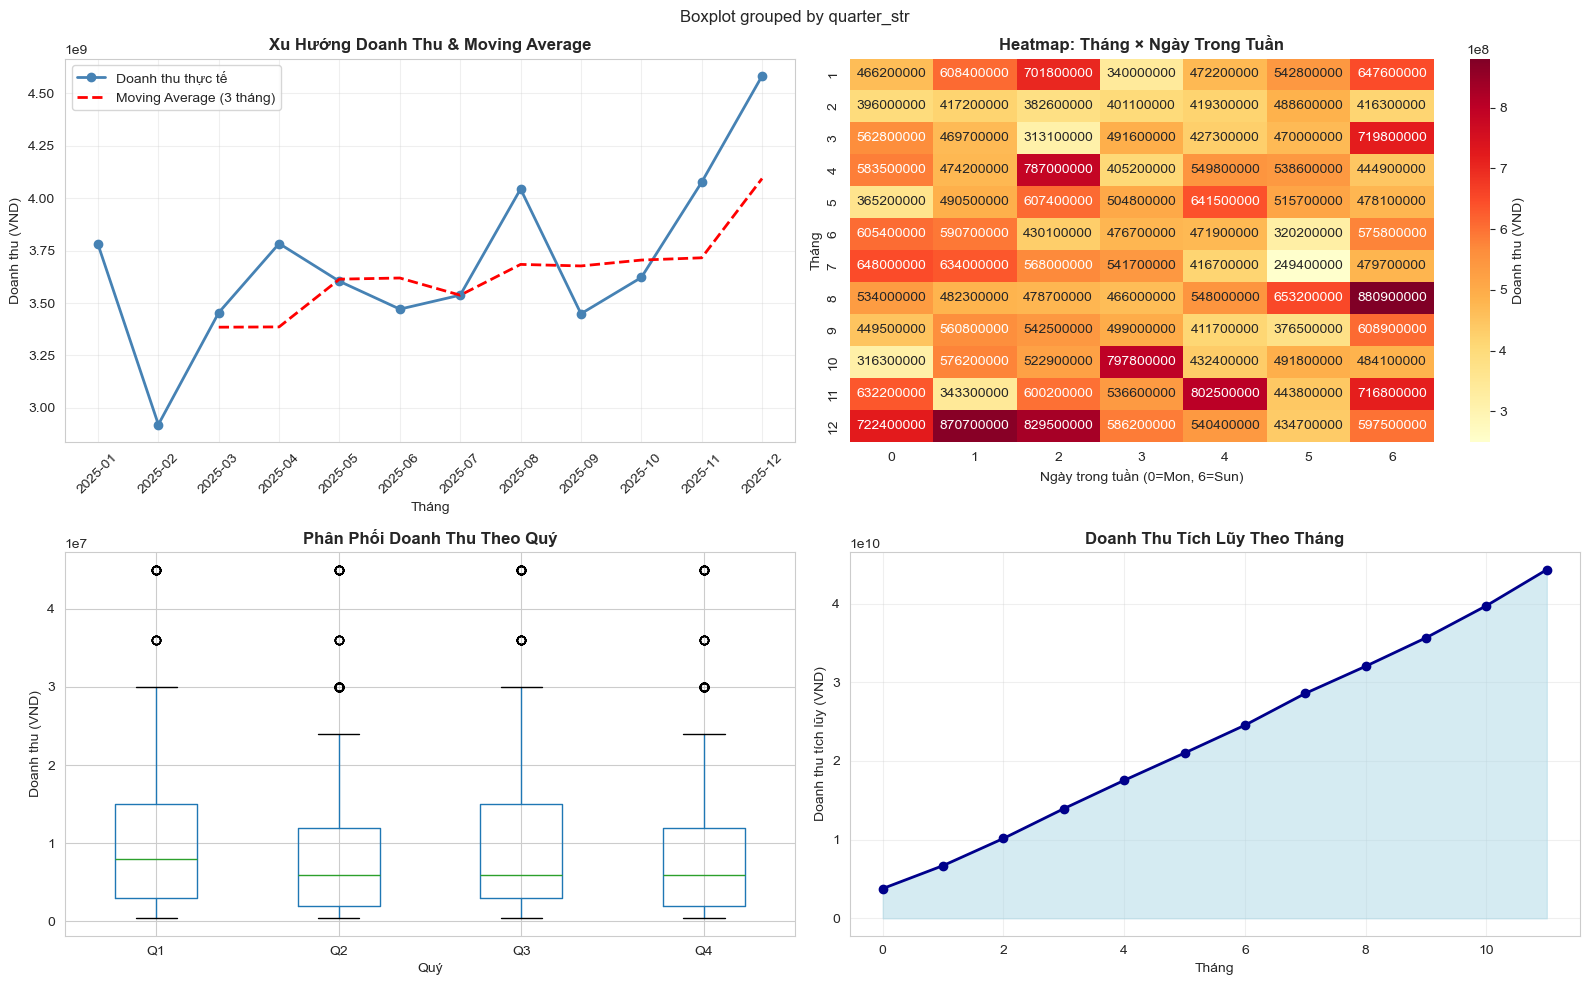


📊 Thống kê xu hướng:
   - Tháng có doanh thu cao nhất: Tháng 12
   - Quý có doanh thu cao nhất: Q4
   - Ngày trong tuần có doanh thu cao nhất: Sunday
   - Tốc độ tăng trưởng trung bình: 2.56% mỗi tháng

✅ Hoàn thành trực quan hóa xu hướng thời gian!


In [ ]:
print("\n📅 PHÂN TÍCH XU HƯỚNG THEO THỜI GIAN")
print("=" * 80)

# Doanh thu theo tháng
monthly_revenue = df.groupby(['year', 'month']).agg({
    'total': 'sum',
    'order_id': 'count'
}).reset_index()
monthly_revenue['year_month'] = monthly_revenue['year'].astype(str) + '-' + monthly_revenue['month'].astype(str).str.zfill(2)

# Tạo visualizations với Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Doanh Thu Theo Tháng', 'Số Đơn Hàng Theo Tháng',
                    'Doanh Thu Theo Ngày Trong Tuần', 'Doanh Thu Theo Quý'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Doanh thu theo tháng
fig.add_trace(
    go.Scatter(x=monthly_revenue['year_month'], y=monthly_revenue['total'],
               mode='lines+markers', name='Doanh thu', 
               line=dict(color='royalblue', width=3),
               marker=dict(size=10),
               fill='tozeroy', fillcolor='rgba(65, 105, 225, 0.1)'),
    row=1, col=1
)

# 2. Số đơn hàng theo tháng
fig.add_trace(
    go.Bar(x=monthly_revenue['year_month'], y=monthly_revenue['order_id'],
           name='Số đơn hàng', marker_color='lightcoral',
           text=monthly_revenue['order_id'], textposition='outside'),
    row=1, col=2
)

# 3. Doanh thu theo ngày trong tuần
day_revenue = df.groupby('day_name')['total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
fig.add_trace(
    go.Bar(x=day_revenue.index, y=day_revenue.values,
           name='Doanh thu', marker_color='mediumseagreen',
           marker=dict(line=dict(color='darkgreen', width=2))),
    row=2, col=1
)

# 4. Doanh thu theo quý
quarter_revenue = df.groupby('quarter')['total'].sum()
fig.add_trace(
    go.Bar(x=[f'Q{q}' for q in quarter_revenue.index], y=quarter_revenue.values,
           name='Doanh thu', marker_color='mediumpurple',
           text=[f'{v/1e6:.1f}M' for v in quarter_revenue.values],
           textposition='outside'),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False, 
                  title_text="Phân Tích Xu Hướng Thời Gian",
                  title_font_size=20)
fig.update_xaxes(tickangle=45)
plt.savefig("../img/truc_quan_hoa_xu_huong_thoi_gian.png", dpi=300, bbox_inches='tight')
fig.show()

# Thêm Matplotlib visualization cho xu hướng chi tiết
fig_mat, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Line chart với moving average
monthly_data = df.groupby(df['order_date'].dt.to_period('M'))['total'].sum().reset_index()
monthly_data['order_date'] = monthly_data['order_date'].astype(str)
monthly_data['MA_3'] = monthly_data['total'].rolling(window=3).mean()

axes[0, 0].plot(monthly_data['order_date'], monthly_data['total'], 
                marker='o', linewidth=2, label='Doanh thu thực tế', color='steelblue')
axes[0, 0].plot(monthly_data['order_date'], monthly_data['MA_3'], 
                linestyle='--', linewidth=2, label='Moving Average (3 tháng)', color='red')
axes[0, 0].set_title('Xu Hướng Doanh Thu & Moving Average', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tháng')
axes[0, 0].set_ylabel('Doanh thu (VND)')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(alpha=0.3)

# 2. Heatmap doanh thu theo tháng và ngày trong tuần
heatmap_data = df.groupby(['month', 'day_of_week'])['total'].sum().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[0, 1], 
            cbar_kws={'label': 'Doanh thu (VND)'})
axes[0, 1].set_title('Heatmap: Tháng × Ngày Trong Tuần', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Ngày trong tuần (0=Mon, 6=Sun)')
axes[0, 1].set_ylabel('Tháng')

# 3. Box plot doanh thu theo quý
df['quarter_str'] = 'Q' + df['quarter'].astype(str)
df.boxplot(column='total', by='quarter_str', ax=axes[1, 0])
axes[1, 0].set_title('Phân Phối Doanh Thu Theo Quý', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Quý')
axes[1, 0].set_ylabel('Doanh thu (VND)')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# 4. Area chart doanh thu tích lũy
monthly_data['cumulative'] = monthly_data['total'].cumsum()
axes[1, 1].fill_between(range(len(monthly_data)), 
                         monthly_data['cumulative'], 
                         alpha=0.5, color='lightblue')
axes[1, 1].plot(monthly_data['cumulative'], linewidth=2, color='darkblue', marker='o')
axes[1, 1].set_title('Doanh Thu Tích Lũy Theo Tháng', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tháng')
axes[1, 1].set_ylabel('Doanh thu tích lũy (VND)')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("../img/truc_quan_hoa_xu_huong_thoi_gian_matplotlib.png", dpi=300, bbox_inches='tight')
plt.show()

# In thống kê
best_month = monthly_revenue.loc[monthly_revenue['total'].idxmax(), 'month']
best_quarter = quarter_revenue.idxmax()
best_day = day_revenue.idxmax()

print(f"\n📊 Thống kê xu hướng:")
print(f"   - Tháng có doanh thu cao nhất: Tháng {best_month}")
print(f"   - Quý có doanh thu cao nhất: Q{best_quarter}")
print(f"   - Ngày trong tuần có doanh thu cao nhất: {best_day}")
print(f"   - Tốc độ tăng trưởng trung bình: {monthly_data['total'].pct_change().mean()*100:.2f}% mỗi tháng")

print("\n✅ Hoàn thành trực quan hóa xu hướng thời gian!")

CELL 7: Phân tích RFM (Recency, Frequency, Monetary)


💎 PHÂN TÍCH RFM (Recency, Frequency, Monetary)
📋 Thống kê RFM:
       recency  frequency     monetary
count   994.00     994.00       994.00
mean     65.42       5.03  44586921.53
std      66.68       2.17  26837971.36
min       1.00       1.00    800000.00
25%      19.00       3.00  24000000.00
50%      43.00       5.00  40000000.00
75%      87.75       6.00  61375000.00
max     362.00      12.00 157500000.00

📊 Phân khúc khách hàng:
                 Số lượng KH  Tổng doanh thu  Tỷ lệ (%)
segment                                                
Loyal Customers          280     13532400000      28.17
Lost                     227      5706500000      22.84
At Risk                  168      8503500000      16.90
Champions                148     11428300000      14.89
Promising                111      3336200000      11.17
Regular                   60      1812500000       6.04


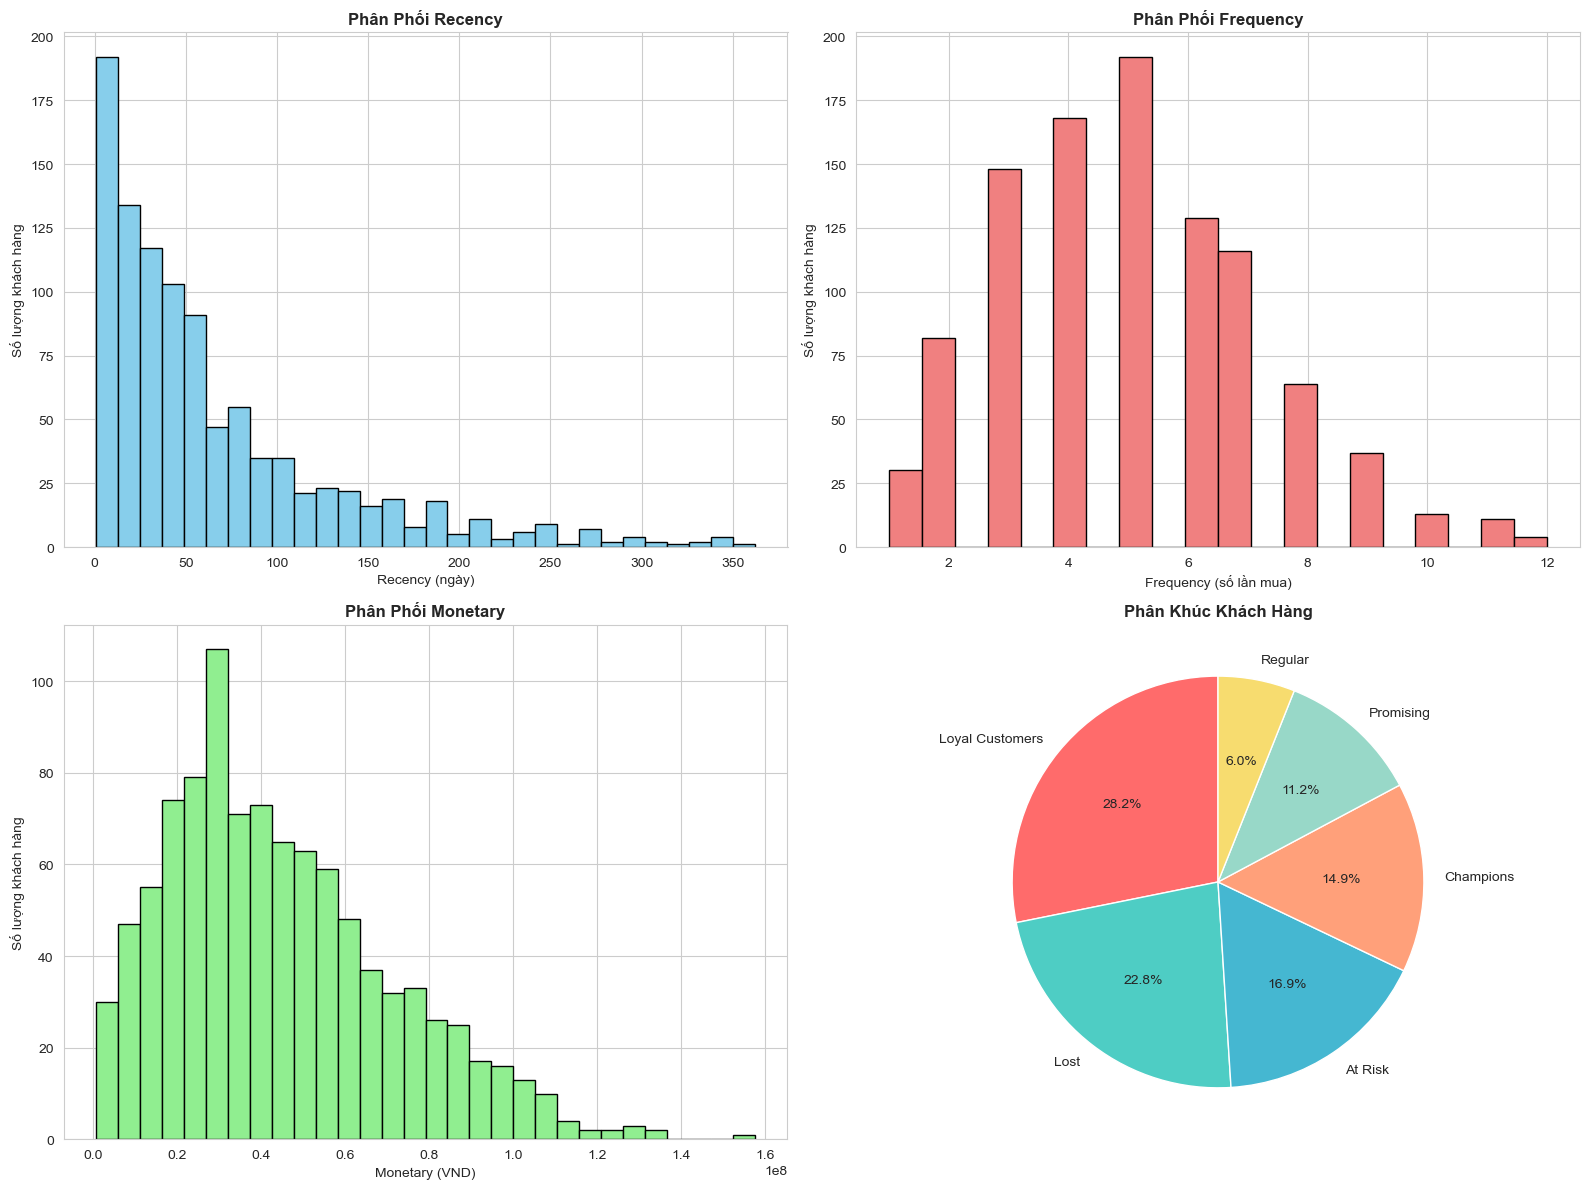


✅ Hoàn thành phân tích RFM!


In [28]:
print("\n💎 PHÂN TÍCH RFM (Recency, Frequency, Monetary)")
print("=" * 80)

# Ngày phân tích (ngày cuối cùng trong dữ liệu + 1)
analysis_date = df['order_date'].max() + timedelta(days=1)

# Tính toán RFM
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (analysis_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'total': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Tạo RFM Score (1-5, 5 là tốt nhất)
rfm['r_score'] = pd.qcut(rfm['recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['m_score'] = pd.qcut(rfm['monetary'], q=5, labels=[1, 2, 3, 4, 5])

rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

# Phân loại khách hàng
def rfm_segment(row):
    if row['r_score'] >= 4 and row['f_score'] >= 4 and row['m_score'] >= 4:
        return 'Champions'
    elif row['r_score'] >= 3 and row['f_score'] >= 3:
        return 'Loyal Customers'
    elif row['r_score'] >= 4 and row['f_score'] <= 2:
        return 'Promising'
    elif row['r_score'] <= 2 and row['f_score'] >= 3:
        return 'At Risk'
    elif row['r_score'] <= 2 and row['f_score'] <= 2:
        return 'Lost'
    else:
        return 'Regular'

rfm['segment'] = rfm.apply(rfm_segment, axis=1)

# Thống kê RFM
print("📋 Thống kê RFM:")
print(rfm[['recency', 'frequency', 'monetary']].describe())

print("\n📊 Phân khúc khách hàng:")
segment_stats = rfm.groupby('segment').agg({
    'customer_id': 'count',
    'monetary': 'sum'
}).rename(columns={'customer_id': 'Số lượng KH', 'monetary': 'Tổng doanh thu'})
segment_stats['Tỷ lệ (%)'] = (segment_stats['Số lượng KH'] / segment_stats['Số lượng KH'].sum() * 100).round(2)
print(segment_stats.sort_values('Số lượng KH', ascending=False))

# Trực quan hóa RFM
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Phân phối Recency
axes[0, 0].hist(rfm['recency'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Recency (ngày)')
axes[0, 0].set_ylabel('Số lượng khách hàng')
axes[0, 0].set_title('Phân Phối Recency', fontsize=12, fontweight='bold')

# 2. Phân phối Frequency
axes[0, 1].hist(rfm['frequency'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Frequency (số lần mua)')
axes[0, 1].set_ylabel('Số lượng khách hàng')
axes[0, 1].set_title('Phân Phối Frequency', fontsize=12, fontweight='bold')

# 3. Phân phối Monetary
axes[1, 0].hist(rfm['monetary'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Monetary (VND)')
axes[1, 0].set_ylabel('Số lượng khách hàng')
axes[1, 0].set_title('Phân Phối Monetary', fontsize=12, fontweight='bold')

# 4. Phân khúc khách hàng
segment_counts = rfm['segment'].value_counts()
colors_seg = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
axes[1, 1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
               colors=colors_seg, startangle=90)
axes[1, 1].set_title('Phân Khúc Khách Hàng', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig("../img/truc_quan_hoa_rfm.png", dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Hoàn thành phân tích RFM!")

CELL 8: Phân tích tương quan và Heat map


🔥 PHÂN TÍCH TƯƠNG QUAN
📊 Ma trận tương quan:
              quantity  price  total  customer_age
quantity          1.00  -0.01   0.48         -0.00
price            -0.01   1.00   0.79          0.00
total             0.48   0.79   1.00          0.00
customer_age     -0.00   0.00   0.00          1.00


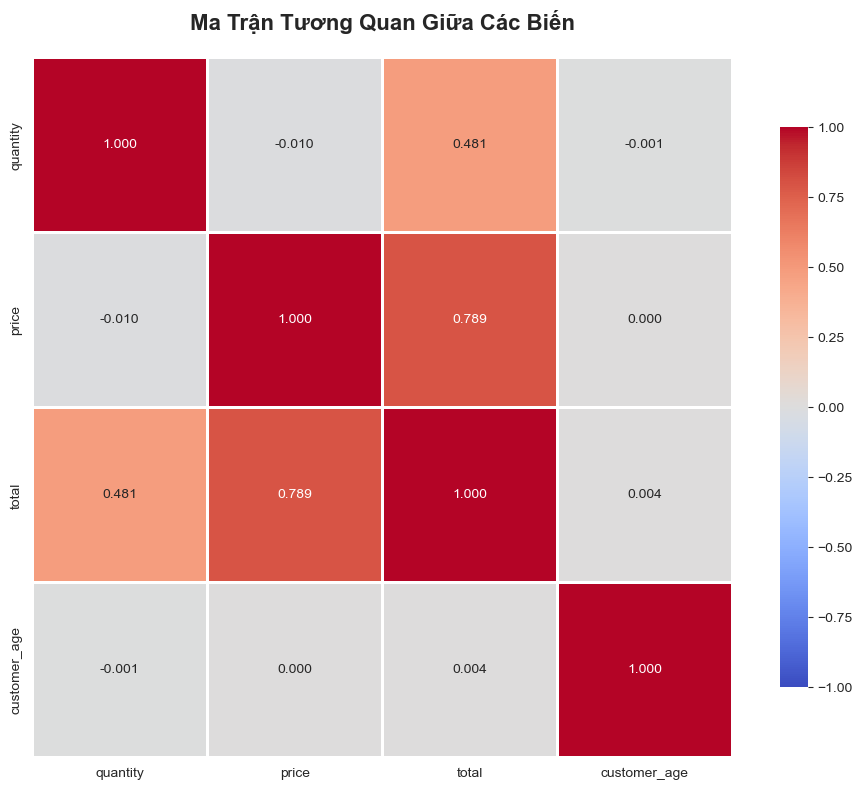


🔍 Phân tích chi tiết:
     Biến 1        Biến 2  Hệ số tương quan
3     price         total              0.79
1  quantity         total              0.48
0  quantity         price             -0.01
5     total  customer_age              0.00
2  quantity  customer_age             -0.00
4     price  customer_age              0.00

✅ Hoàn thành phân tích tương quan!


In [29]:
print("\n🔥 PHÂN TÍCH TƯƠNG QUAN")
print("=" * 80)

# Tạo dataframe cho correlation
corr_df = df[['quantity', 'price', 'total', 'customer_age']].copy()

# Tính correlation matrix
correlation_matrix = corr_df.corr()

print("📊 Ma trận tương quan:")
print(correlation_matrix)

# Tạo heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Ma Trận Tương Quan Giữa Các Biến', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig("../img/truc_quan_hoa_tuong_quan.png", dpi=300, bbox_inches='tight')
plt.show()

# Phân tích chi tiết
print("\n🔍 Phân tích chi tiết:")

# Tìm correlation mạnh nhất
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Biến 1': correlation_matrix.columns[i],
            'Biến 2': correlation_matrix.columns[j],
            'Hệ số tương quan': correlation_matrix.iloc[i, j]
        })

corr_pairs_df = pd.DataFrame(corr_pairs).sort_values('Hệ số tương quan', 
                                                       key=abs, ascending=False)
print(corr_pairs_df)

print("\n✅ Hoàn thành phân tích tương quan!")

CELL 9: Phân tích và trực quan hóa nâng cao - Cohort Analysis


👥 PHÂN TÍCH COHORT (Cohort Analysis)


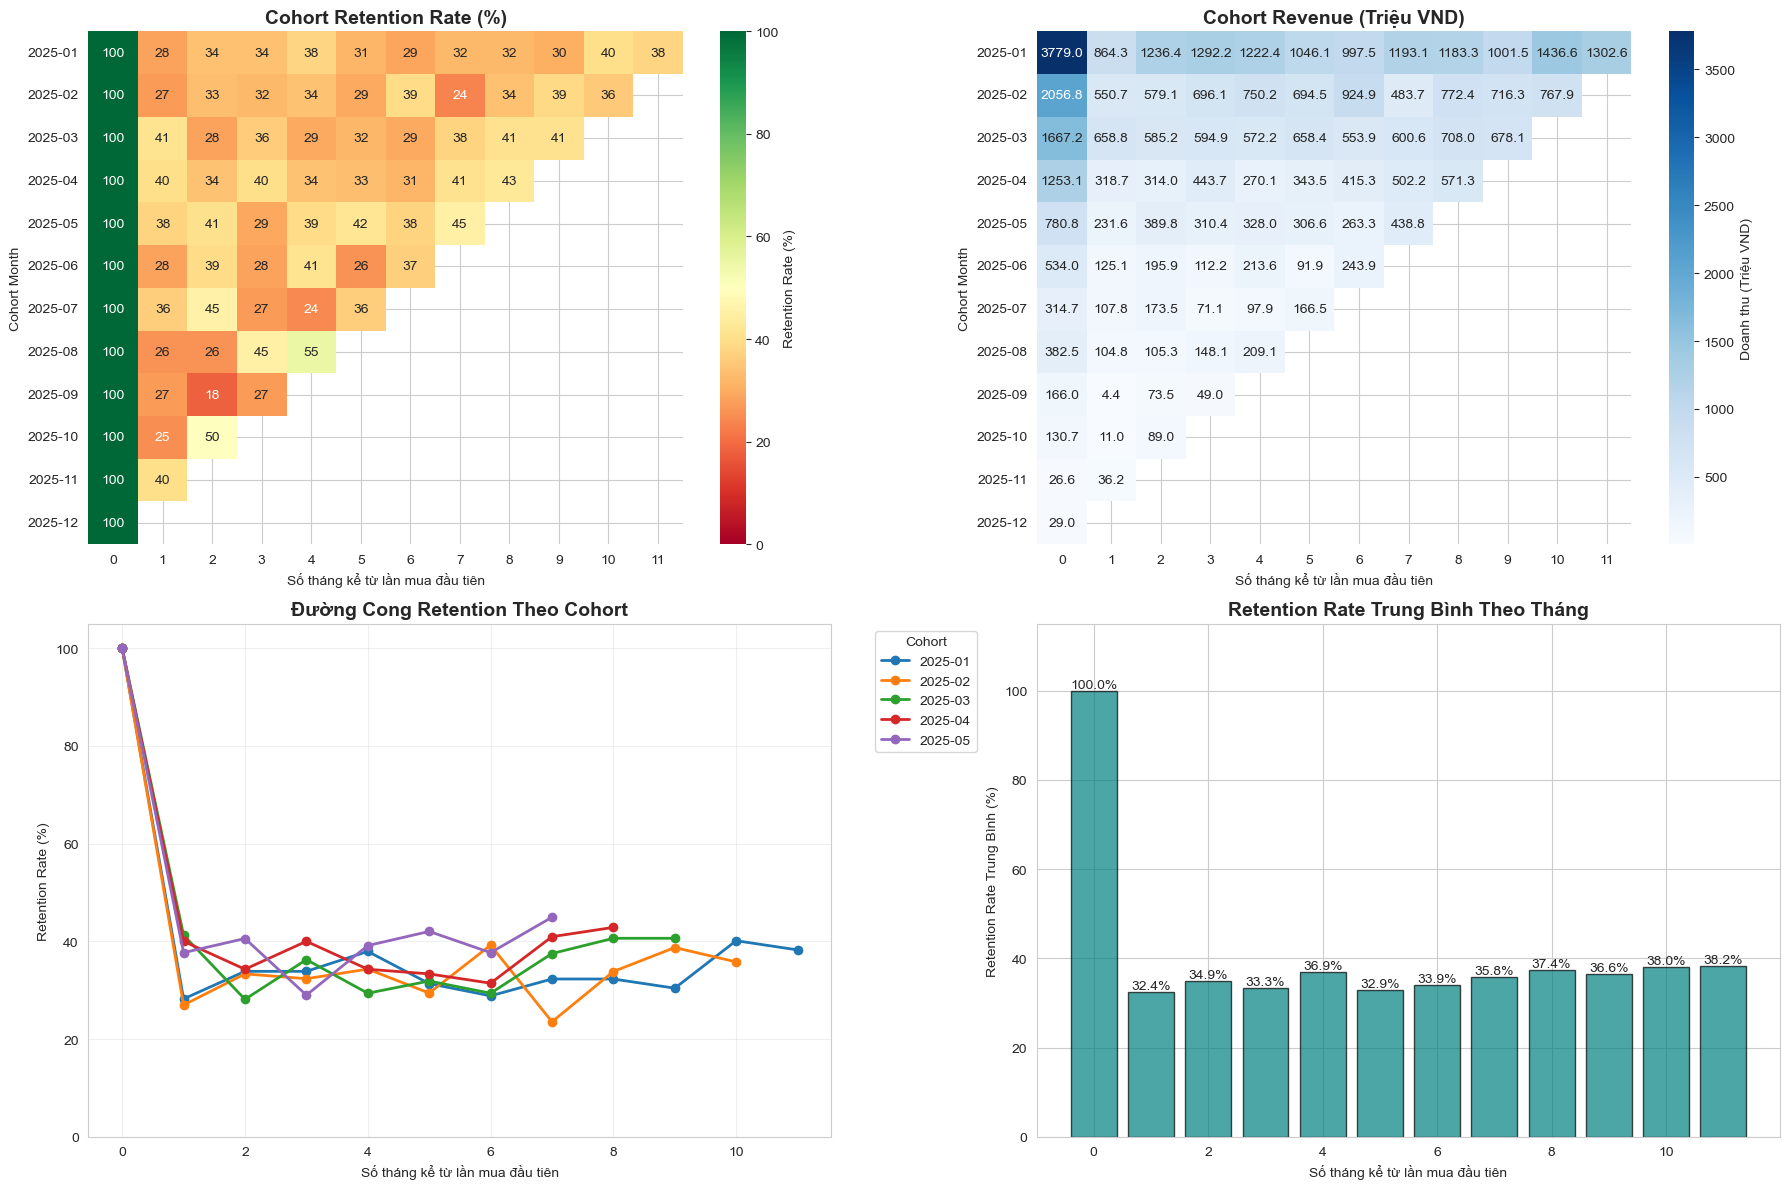


📊 Thống kê Retention:
   - Retention trung bình tháng 1: 32.4%
   - Retention trung bình tháng 3: 33.3%
   - Retention trung bình tháng 6: 33.9%
   - Churn rate trung bình (tháng 1): 67.6%

✅ Hoàn thành phân tích Cohort với trực quan hóa đầy đủ!


<Figure size 1200x600 with 0 Axes>

In [30]:
print("\n👥 PHÂN TÍCH COHORT (Cohort Analysis)")
print("=" * 80)

# Tạo cohort month (tháng khách hàng mua lần đầu)
df_cohort = df.copy()
df_cohort['order_month'] = df_cohort['order_date'].dt.to_period('M')

# Tìm tháng đầu tiên mỗi khách hàng mua hàng
cohort_data = df_cohort.groupby('customer_id')['order_month'].min().reset_index()
cohort_data.columns = ['customer_id', 'cohort_month']

# Merge với df chính
df_cohort = df_cohort.merge(cohort_data, on='customer_id')

# Tính số tháng kể từ cohort month
df_cohort['cohort_index'] = (df_cohort['order_month'] - df_cohort['cohort_month']).apply(lambda x: x.n)

# Tạo cohort table
cohort_counts = df_cohort.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().reset_index()
cohort_counts = cohort_counts.pivot(index='cohort_month', columns='cohort_index', values='customer_id')

# Retention rate
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0) * 100

# Cohort revenue
cohort_revenue = df_cohort.groupby(['cohort_month', 'cohort_index'])['total'].sum().reset_index()
cohort_revenue_pivot = cohort_revenue.pivot(index='cohort_month', columns='cohort_index', values='total')

# Tạo multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Retention Rate Heatmap
sns.heatmap(retention, annot=True, fmt='.0f', cmap='RdYlGn', vmin=0, vmax=100,
            cbar_kws={'label': 'Retention Rate (%)'}, ax=axes[0, 0])
axes[0, 0].set_title('Cohort Retention Rate (%)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Số tháng kể từ lần mua đầu tiên')
axes[0, 0].set_ylabel('Cohort Month')

# 2. Cohort Revenue Heatmap
sns.heatmap(cohort_revenue_pivot/1e6, annot=True, fmt='.1f', cmap='Blues',
            cbar_kws={'label': 'Doanh thu (Triệu VND)'}, ax=axes[0, 1])
axes[0, 1].set_title('Cohort Revenue (Triệu VND)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Số tháng kể từ lần mua đầu tiên')
axes[0, 1].set_ylabel('Cohort Month')

# 3. Retention Curve (Line plot)
if retention.shape[1] > 1:
    for idx in retention.index[:5]:  # Vẽ 5 cohort đầu
        axes[1, 0].plot(retention.columns, retention.loc[idx], 
                       marker='o', linewidth=2, label=str(idx))
    axes[1, 0].set_title('Đường Cong Retention Theo Cohort', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Số tháng kể từ lần mua đầu tiên')
    axes[1, 0].set_ylabel('Retention Rate (%)')
    axes[1, 0].legend(title='Cohort', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1, 0].grid(alpha=0.3)
    axes[1, 0].set_ylim([0, 105])

# 4. Average Retention by Month
avg_retention = retention.mean()
axes[1, 1].bar(avg_retention.index, avg_retention.values, 
               color='teal', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Retention Rate Trung Bình Theo Tháng', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Số tháng kể từ lần mua đầu tiên')
axes[1, 1].set_ylabel('Retention Rate Trung Bình (%)')
for i, v in enumerate(avg_retention.values):
    axes[1, 1].text(i, v, f'{v:.1f}%', ha='center', va='bottom')
axes[1, 1].set_ylim([0, max(avg_retention.values) * 1.15])

plt.tight_layout()
plt.savefig("../img/truc_quan_hoa_cohort.png", dpi=300, bbox_inches='tight')
plt.show()

# Interactive Plotly visualization
fig_plotly = go.Figure()

# Thêm từng cohort như một line
for idx in retention.index[:8]:  # Top 8 cohorts
    fig_plotly.add_trace(go.Scatter(
        x=retention.columns,
        y=retention.loc[idx],
        mode='lines+markers',
        name=str(idx),
        hovertemplate='Tháng %{x}<br>Retention: %{y:.1f}%<extra></extra>'
    ))

fig_plotly.update_layout(
    title='Cohort Analysis - Interactive Retention Curves',
    xaxis_title='Số tháng kể từ lần mua đầu tiên',
    yaxis_title='Retention Rate (%)',
    hovermode='x unified',
    height=500,
    yaxis=dict(range=[0, 105])
)
plt.savefig("../img/truc_quan_hoa_cohort_plotly.png", dpi=300, bbox_inches='tight')
fig_plotly.show()

print("\n📊 Thống kê Retention:")
print(f"   - Retention trung bình tháng 1: {retention[1].mean():.1f}%")
if len(retention.columns) > 3:
    print(f"   - Retention trung bình tháng 3: {retention[3].mean():.1f}%")
if len(retention.columns) > 6:
    print(f"   - Retention trung bình tháng 6: {retention[6].mean():.1f}%")

# Phân tích churn rate
if len(retention.columns) > 1:
    churn_rate = 100 - retention[1].mean()
    print(f"   - Churn rate trung bình (tháng 1): {churn_rate:.1f}%")

print("\n✅ Hoàn thành phân tích Cohort với trực quan hóa đầy đủ!")


CELL 10: Dashboard tương tác với Plotly

In [31]:
print("\n📊 DASHBOARD TƯƠNG TÁC")
print("=" * 80)

# Tạo dashboard với multiple subplots
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=('Doanh Thu Theo Sản Phẩm', 'Doanh Thu Theo Vùng',
                    'Xu Hướng Doanh Thu Theo Tháng', 'Phân Khúc Khách Hàng',
                    'Doanh Thu Theo Nhóm Tuổi', 'Top 10 Khách Hàng'),
    specs=[[{"type": "bar"}, {"type": "pie"}],
           [{"type": "scatter", "colspan": 2}, None],
           [{"type": "bar"}, {"type": "bar"}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

# 1. Doanh Thu Theo Sản Phẩm
product_revenue = df.groupby('product_name')['total'].sum().sort_values(ascending=False).head(10)
fig.add_trace(
    go.Bar(x=product_revenue.index, y=product_revenue.values, 
           marker_color='lightblue', name='Doanh thu'),
    row=1, col=1
)

# 2. Doanh Thu Theo Vùng (Pie chart)
region_revenue = df.groupby('region')['total'].sum()
fig.add_trace(
    go.Pie(labels=region_revenue.index, values=region_revenue.values,
           hole=0.3, name='Doanh thu'),
    row=1, col=2
)

# 3. Xu Hướng Doanh Thu Theo Tháng
monthly_trend = df.groupby(df['order_date'].dt.to_period('M'))['total'].sum().reset_index()
monthly_trend['order_date'] = monthly_trend['order_date'].astype(str)
fig.add_trace(
    go.Scatter(x=monthly_trend['order_date'], y=monthly_trend['total'],
               mode='lines+markers', line=dict(color='royalblue', width=3),
               marker=dict(size=8), name='Doanh thu'),
    row=2, col=1
)

# 4. Phân Khúc Khách Hàng
segment_counts = rfm['segment'].value_counts()
fig.add_trace(
    go.Bar(x=segment_counts.index, y=segment_counts.values,
           marker_color='coral', name='Số KH'),
    row=3, col=1
)

# 5. Doanh Thu Theo Nhóm Tuổi
age_revenue = df.groupby('age_group')['total'].sum().sort_index()
fig.add_trace(
    go.Bar(x=age_revenue.index, y=age_revenue.values,
           marker_color='lightgreen', name='Doanh thu'),
    row=3, col=2
)

# Update layout
fig.update_layout(
    height=1200,
    showlegend=False,
    title_text="Dashboard Phân Tích Dữ Liệu Bán Hàng",
    title_font_size=20
)

fig.update_xaxes(tickangle=45)
plt.savefig("../img/dashboard_tuong_tac.png", dpi=300, bbox_inches='tight')
fig.show()

print("✅ Dashboard tương tác đã được tạo!")


📊 DASHBOARD TƯƠNG TÁC


✅ Dashboard tương tác đã được tạo!


<Figure size 1200x600 with 0 Axes>

CELL 11: Phân tích và trực quan hóa chi tiết theo nhóm khách hàng


👥 PHÂN TÍCH CHI TIẾT THEO NHÓM KHÁCH HÀNG

📊 Phân tích theo nhóm tuổi:
           Số đơn hàng  Tổng doanh thu        AOV  Số KH  % Doanh thu
age_group                                                            
26-35             1575     14243500000 9043492.00    784        32.14
36-45             1392     12302100000 8837716.00    753        27.76
18-25             1182     10269900000 8688579.00    705        23.17
46-55              652      5552000000 8515337.00    477        12.53
56+                199      1951900000 9808543.00    178         4.40

🎯 Nhóm tuổi đóng góp nhiều nhất: 26-35


<Figure size 1200x600 with 0 Axes>

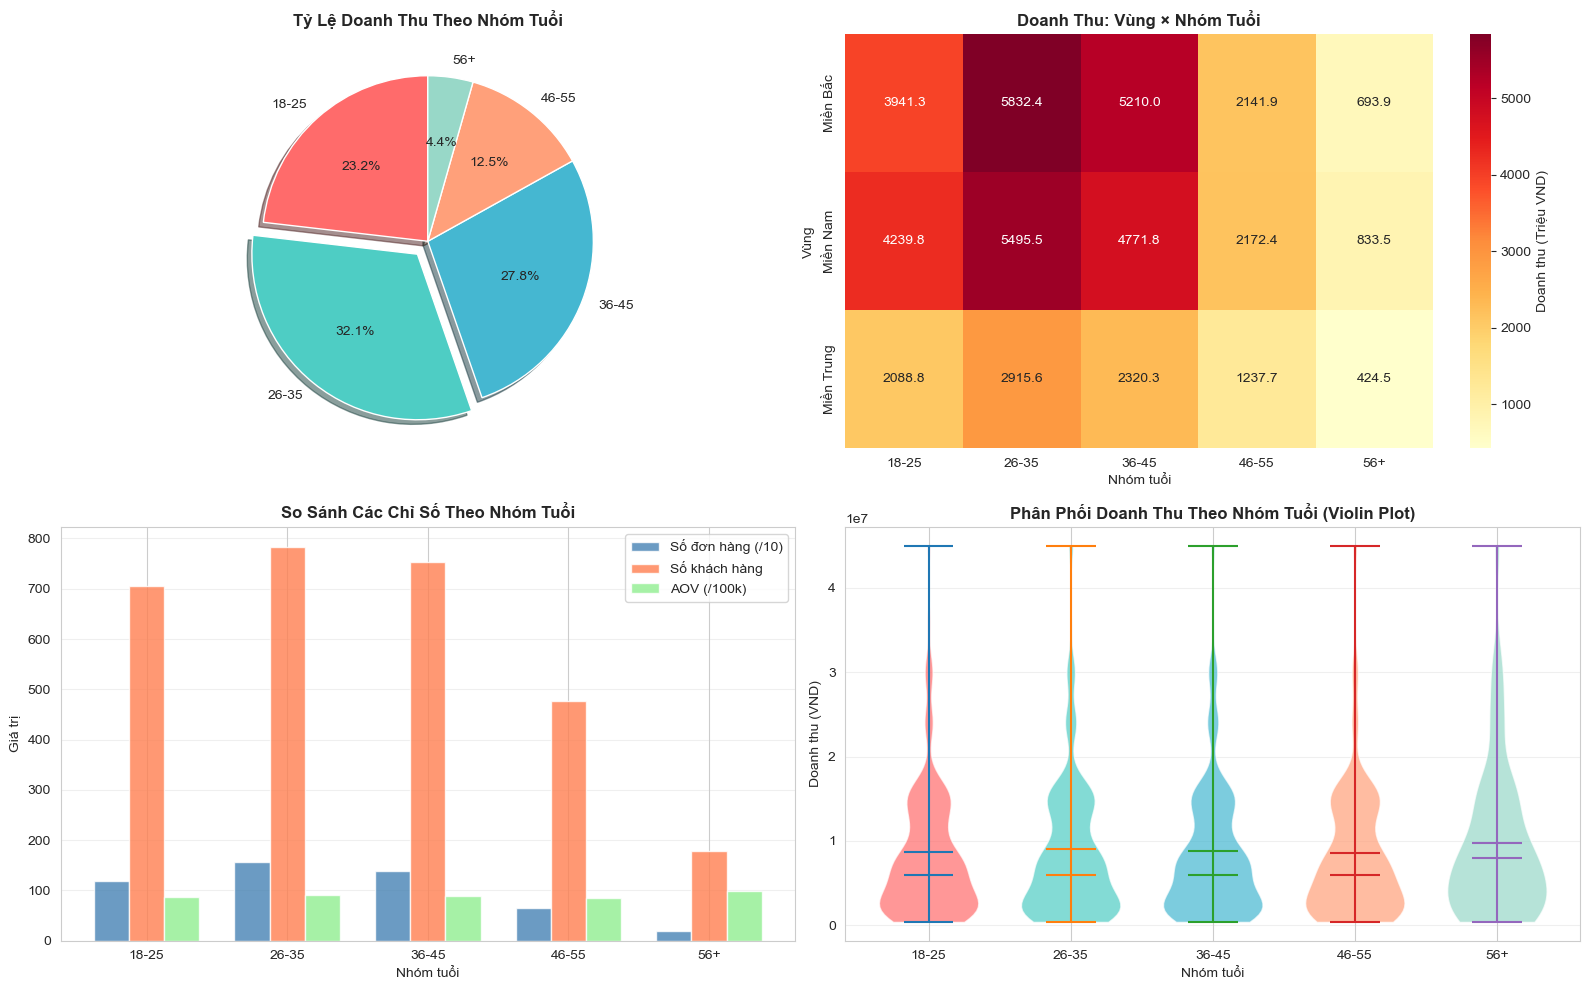


✅ Hoàn thành phân tích nhóm khách hàng với trực quan hóa đa dạng!


<Figure size 1200x600 with 0 Axes>

In [32]:
print("\n👥 PHÂN TÍCH CHI TIẾT THEO NHÓM KHÁCH HÀNG")
print("=" * 80)

# Phân tích theo nhóm tuổi
age_analysis = df.groupby('age_group').agg({
    'order_id': 'count',
    'total': ['sum', 'mean'],
    'customer_id': 'nunique'
}).round(0)

age_analysis.columns = ['Số đơn hàng', 'Tổng doanh thu', 'AOV', 'Số KH']
age_analysis['% Doanh thu'] = (age_analysis['Tổng doanh thu'] / age_analysis['Tổng doanh thu'].sum() * 100).round(2)

print("\n📊 Phân tích theo nhóm tuổi:")
print(age_analysis.sort_values('Tổng doanh thu', ascending=False))

# Tìm nhóm tuổi chính
primary_age_group = age_analysis['Tổng doanh thu'].idxmax()
print(f"\n🎯 Nhóm tuổi đóng góp nhiều nhất: {primary_age_group}")

# Phân tích theo vùng và nhóm tuổi
region_age = df.groupby(['region', 'age_group'])['total'].sum().unstack(fill_value=0)

# Tạo comprehensive visualizations
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Doanh Thu Theo Nhóm Tuổi', 'Số Khách Hàng Theo Nhóm Tuổi',
                    'AOV Theo Nhóm Tuổi', 'Số Đơn Hàng Theo Nhóm Tuổi'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# 1. Doanh thu theo nhóm tuổi
fig.add_trace(
    go.Bar(x=age_analysis.index, y=age_analysis['Tổng doanh thu'],
           marker_color='skyblue', text=age_analysis['Tổng doanh thu'],
           texttemplate='%{text:,.0f}', textposition='outside'),
    row=1, col=1
)

# 2. Số khách hàng
fig.add_trace(
    go.Bar(x=age_analysis.index, y=age_analysis['Số KH'],
           marker_color='lightcoral', text=age_analysis['Số KH'],
           textposition='outside'),
    row=1, col=2
)

# 3. AOV
fig.add_trace(
    go.Bar(x=age_analysis.index, y=age_analysis['AOV'],
           marker_color='lightgreen', text=age_analysis['AOV'],
           texttemplate='%{text:,.0f}', textposition='outside'),
    row=2, col=1
)

# 4. Số đơn hàng
fig.add_trace(
    go.Bar(x=age_analysis.index, y=age_analysis['Số đơn hàng'],
           marker_color='mediumpurple', text=age_analysis['Số đơn hàng'],
           textposition='outside'),
    row=2, col=2
)

fig.update_layout(height=800, showlegend=False,
                  title_text="Phân Tích Toàn Diện Theo Nhóm Tuổi",
                  title_font_size=18)
plt.savefig("../img/phan_tich_toan_dien_theo_nhom_tuoi.png", dpi=300, bbox_inches='tight')
fig.show()

# Matplotlib visualizations
fig_mat, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Pie chart - Tỷ lệ doanh thu theo nhóm tuổi
colors_age = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
explode = [0.1 if i == age_analysis['Tổng doanh thu'].idxmax() else 0 
           for i in age_analysis.index]
axes[0, 0].pie(age_analysis['Tổng doanh thu'], labels=age_analysis.index, 
               autopct='%1.1f%%', colors=colors_age, explode=explode,
               startangle=90, shadow=True)
axes[0, 0].set_title('Tỷ Lệ Doanh Thu Theo Nhóm Tuổi', fontsize=12, fontweight='bold')

# 2. Heatmap vùng x nhóm tuổi
sns.heatmap(region_age/1e6, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0, 1], 
            cbar_kws={'label': 'Doanh thu (Triệu VND)'})
axes[0, 1].set_title('Doanh Thu: Vùng × Nhóm Tuổi', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Nhóm tuổi')
axes[0, 1].set_ylabel('Vùng')

# 3. Grouped bar chart - So sánh metrics
x = np.arange(len(age_analysis.index))
width = 0.25
axes[1, 0].bar(x - width, age_analysis['Số đơn hàng']/10, width, 
               label='Số đơn hàng (/10)', color='steelblue', alpha=0.8)
axes[1, 0].bar(x, age_analysis['Số KH'], width, 
               label='Số khách hàng', color='coral', alpha=0.8)
axes[1, 0].bar(x + width, age_analysis['AOV']/100000, width, 
               label='AOV (/100k)', color='lightgreen', alpha=0.8)
axes[1, 0].set_xlabel('Nhóm tuổi')
axes[1, 0].set_ylabel('Giá trị')
axes[1, 0].set_title('So Sánh Các Chỉ Số Theo Nhóm Tuổi', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(age_analysis.index)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Violin plot - Phân phối doanh thu theo nhóm tuổi
for i, age_grp in enumerate(df['age_group'].cat.categories):
    data = df[df['age_group'] == age_grp]['total']
    parts = axes[1, 1].violinplot([data], positions=[i], widths=0.7,
                                    showmeans=True, showmedians=True)
    for pc in parts['bodies']:
        pc.set_facecolor(colors_age[i % len(colors_age)])
        pc.set_alpha(0.7)

axes[1, 1].set_title('Phân Phối Doanh Thu Theo Nhóm Tuổi (Violin Plot)', 
                      fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(range(len(df['age_group'].cat.categories)))
axes[1, 1].set_xticklabels(df['age_group'].cat.categories)
axes[1, 1].set_xlabel('Nhóm tuổi')
axes[1, 1].set_ylabel('Doanh thu (VND)')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("../img/phan_tich_chi_tiet_theo_nhom_khach_hang.png", dpi=300, bbox_inches='tight')
plt.show()

# Thêm Sankey diagram cho customer journey
# Tạo dữ liệu cho Sankey: Vùng -> Nhóm tuổi -> Phân khúc RFM
df_sankey = df.merge(rfm[['customer_id', 'segment']], on='customer_id')

# Tính toán flows
flows_region_age = df_sankey.groupby(['region', 'age_group'])['total'].sum().reset_index()
flows_age_segment = df_sankey.groupby(['age_group', 'segment'])['total'].sum().reset_index()

# Tạo nodes và links cho Sankey
all_nodes = list(df_sankey['region'].unique()) + \
            list(df_sankey['age_group'].cat.categories) + \
            list(df_sankey['segment'].unique())

node_dict = {node: idx for idx, node in enumerate(all_nodes)}

# Links
links_source = []
links_target = []
links_value = []

for _, row in flows_region_age.iterrows():
    links_source.append(node_dict[row['region']])
    links_target.append(node_dict[row['age_group']])
    links_value.append(row['total'])

for _, row in flows_age_segment.iterrows():
    links_source.append(node_dict[row['age_group']])
    links_target.append(node_dict[row['segment']])
    links_value.append(row['total'])

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8',
               '#F7DC6F', '#BB8FCE', '#85C1E2', '#F8B88B', '#AAB7B8']
    ),
    link=dict(
        source=links_source,
        target=links_target,
        value=links_value
    )
)])

fig_sankey.update_layout(
    title_text="Customer Journey: Vùng → Nhóm Tuổi → Phân Khúc RFM",
    font_size=12,
    height=600
)
plt.savefig("../img/sankey_customer_journey.png", dpi=300, bbox_inches='tight')
fig_sankey.show()

print("\n✅ Hoàn thành phân tích nhóm khách hàng với trực quan hóa đa dạng!")

CELL 12: Phân tích và trực quan hóa sản phẩm chi tiết


🛍️ PHÂN TÍCH SẢN PHẨM CHI TIẾT
📊 Bảng phân tích sản phẩm:
              Số đơn hàng  Số lượng bán  Tổng doanh thu         AOV  Số KH  \
product_name                                                                 
Laptop                729          1014     15210000000 20864198.00    510   
Smartphone           1057          1495     11960000000 11315043.00    656   
Camera                353           494      5928000000 16793201.00    304   
Tablet                515           746      4476000000  8691262.00    415   
Smartwatch            501           702      2106000000  4203593.00    393   
Monitor               236           329      1645000000  6970339.00    208   
Headphones            761          1092      1638000000  2152431.00    527   
Speaker               342           463       926000000  2707602.00    291   
Keyboard              261           359       287200000  1100383.00    220   
Mouse                 245           358       143200000   584490.00    213   

    

<Figure size 1200x600 with 0 Axes>

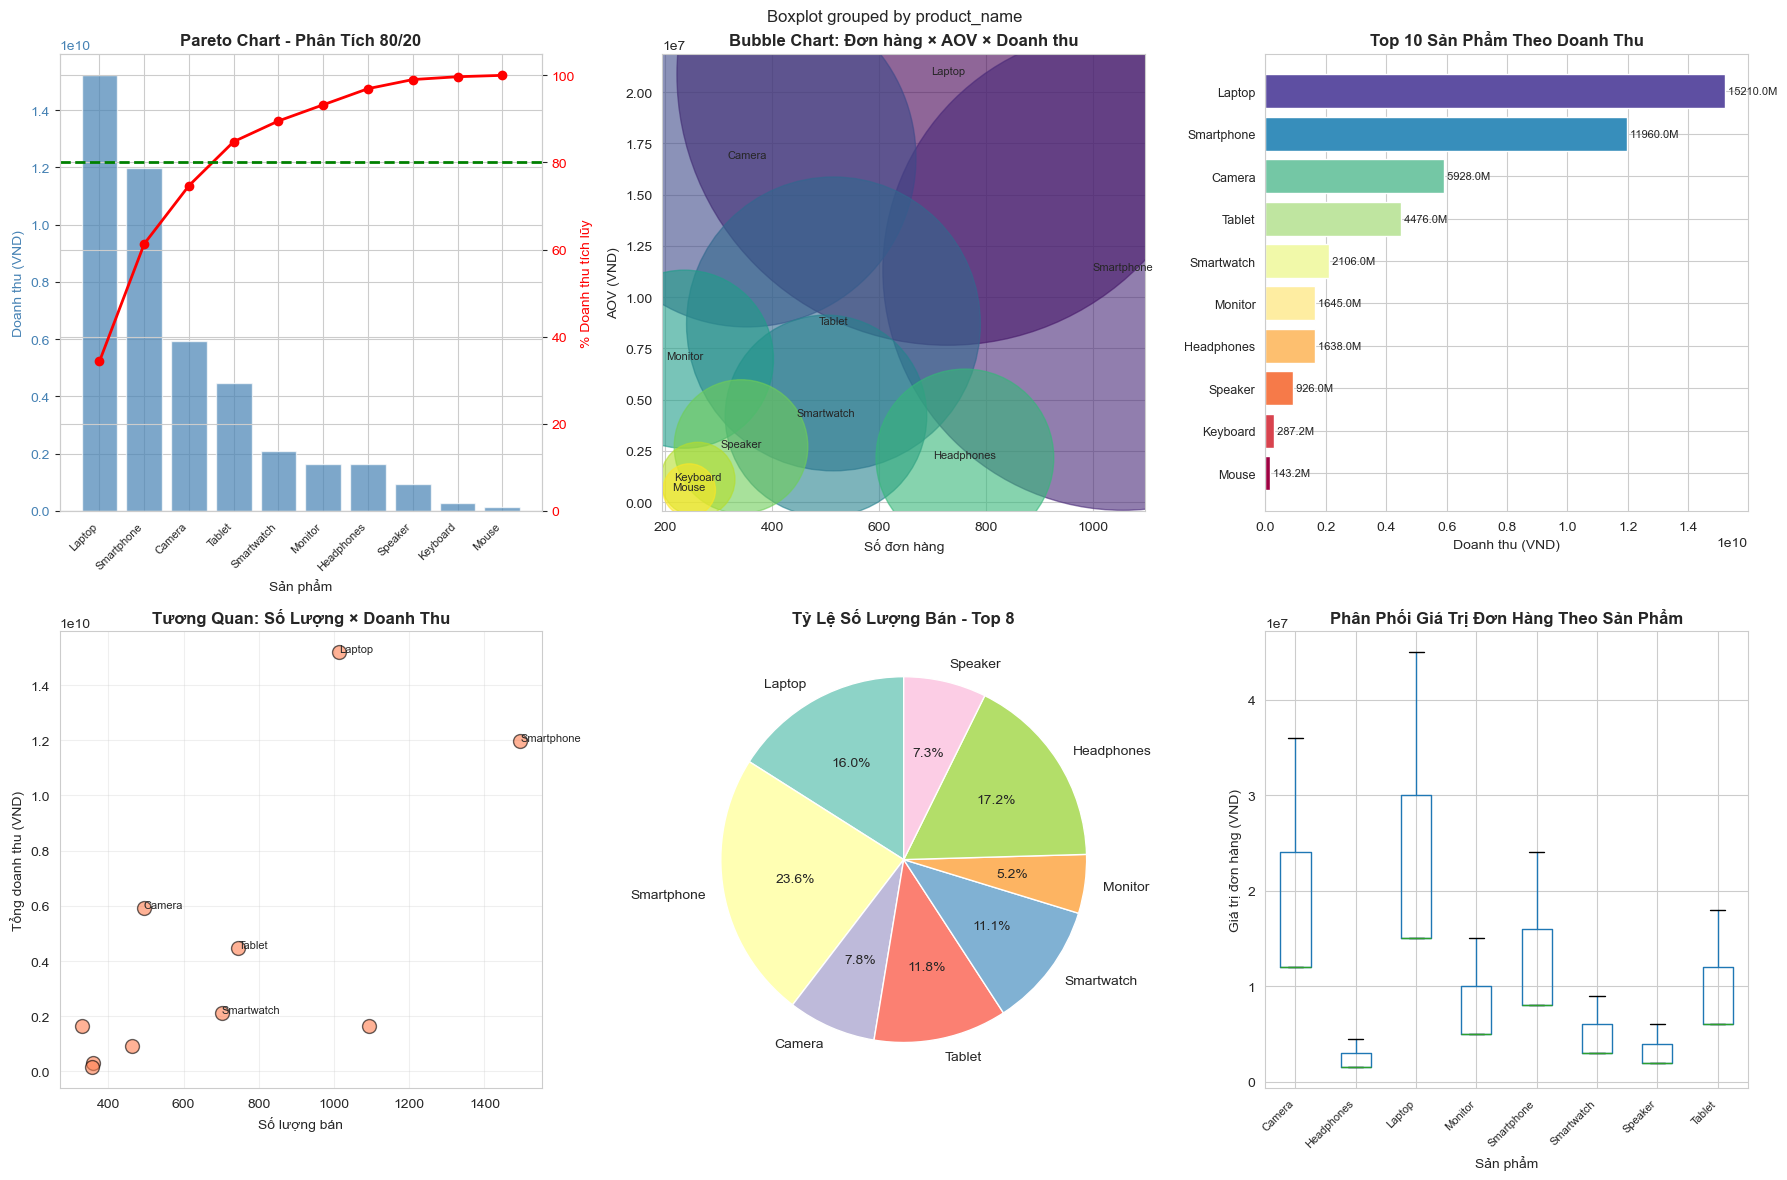


✅ Hoàn thành phân tích sản phẩm với trực quan hóa đa chiều!


<Figure size 1200x600 with 0 Axes>

In [33]:
print("\n🛍️ PHÂN TÍCH SẢN PHẨM CHI TIẾT")
print("=" * 80)

# Phân tích toàn diện theo sản phẩm
product_analysis = df.groupby('product_name').agg({
    'order_id': 'count',
    'quantity': 'sum',
    'total': ['sum', 'mean'],
    'customer_id': 'nunique'
}).round(0)

product_analysis.columns = ['Số đơn hàng', 'Số lượng bán', 'Tổng doanh thu', 'AOV', 'Số KH']
product_analysis['% Doanh thu'] = (product_analysis['Tổng doanh thu'] / product_analysis['Tổng doanh thu'].sum() * 100).round(2)
product_analysis = product_analysis.sort_values('Tổng doanh thu', ascending=False)

print("📊 Bảng phân tích sản phẩm:")
print(product_analysis)

# Sản phẩm bán chạy nhất
best_product = product_analysis.index[0]
print(f"\n🏆 Sản phẩm bán chạy nhất: {best_product}")
print(f"   - Doanh thu: {product_analysis.loc[best_product, 'Tổng doanh thu']:,.0f} VND")
print(f"   - Số lượng bán: {product_analysis.loc[best_product, 'Số lượng bán']:,.0f} sản phẩm")

# 1. Phân tích theo thời gian cho top sản phẩm
top_5_products = product_analysis.head(5).index

product_monthly = df[df['product_name'].isin(top_5_products)].groupby(
    [df['order_date'].dt.to_period('M'), 'product_name']
)['total'].sum().reset_index()
product_monthly['order_date'] = product_monthly['order_date'].astype(str)

# Interactive line chart
fig_line = px.line(product_monthly, x='order_date', y='total', color='product_name',
              title='Xu Hướng Doanh Thu Top 5 Sản Phẩm Theo Tháng',
              labels={'order_date': 'Tháng', 'total': 'Doanh thu (VND)', 'product_name': 'Sản phẩm'},
              markers=True)
fig_line.update_layout(height=500, hovermode='x unified')
plt.savefig("../img/xu_huong_doanh_thu_top_5_san_pham.png", dpi=300, bbox_inches='tight')
fig_line.show()

# 2. Tạo comprehensive visualization với matplotlib
fig_mat, axes = plt.subplots(2, 3, figsize=(18, 12))

# 2.1. Pareto Chart (80/20 rule)
product_analysis_sorted = product_analysis.sort_values('Tổng doanh thu', ascending=False)
product_analysis_sorted['Cumulative %'] = product_analysis_sorted['% Doanh thu'].cumsum()

ax1 = axes[0, 0]
ax1.bar(range(len(product_analysis_sorted)), product_analysis_sorted['Tổng doanh thu'], 
        color='steelblue', alpha=0.7, label='Doanh thu')
ax1.set_xlabel('Sản phẩm')
ax1.set_ylabel('Doanh thu (VND)', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(range(len(product_analysis_sorted)))
ax1.set_xticklabels(product_analysis_sorted.index, rotation=45, ha='right', fontsize=8)

ax2 = ax1.twinx()
ax2.plot(range(len(product_analysis_sorted)), product_analysis_sorted['Cumulative %'], 
         color='red', marker='o', linewidth=2, label='% Tích lũy')
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80%')
ax2.set_ylabel('% Doanh thu tích lũy', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, 105])
ax1.set_title('Pareto Chart - Phân Tích 80/20', fontsize=12, fontweight='bold')

# 2.2. Treemap-style (bubble chart)
bubble_data = product_analysis.head(10)
scatter = axes[0, 1].scatter(bubble_data['Số đơn hàng'], 
                             bubble_data['AOV'],
                             s=bubble_data['Tổng doanh thu']/1e5,
                             alpha=0.6,
                             c=range(len(bubble_data)),
                             cmap='viridis')
axes[0, 1].set_xlabel('Số đơn hàng')
axes[0, 1].set_ylabel('AOV (VND)')
axes[0, 1].set_title('Bubble Chart: Đơn hàng × AOV × Doanh thu', fontsize=12, fontweight='bold')
for i, prod in enumerate(bubble_data.index):
    axes[0, 1].annotate(prod, 
                       (bubble_data.loc[prod, 'Số đơn hàng'], 
                        bubble_data.loc[prod, 'AOV']),
                       fontsize=8, ha='center')

# 2.3. Horizontal bar - Top 10 sản phẩm
top_10_revenue = product_analysis.head(10)['Tổng doanh thu'].sort_values()
axes[0, 2].barh(range(len(top_10_revenue)), top_10_revenue.values, 
                color=plt.cm.Spectral(np.linspace(0, 1, len(top_10_revenue))))
axes[0, 2].set_yticks(range(len(top_10_revenue)))
axes[0, 2].set_yticklabels(top_10_revenue.index, fontsize=9)
axes[0, 2].set_xlabel('Doanh thu (VND)')
axes[0, 2].set_title('Top 10 Sản Phẩm Theo Doanh Thu', fontsize=12, fontweight='bold')
for i, v in enumerate(top_10_revenue.values):
    axes[0, 2].text(v, i, f' {v/1e6:.1f}M', va='center', fontsize=8)

# 2.4. Scatter plot - Số lượng vs Doanh thu
axes[1, 0].scatter(product_analysis['Số lượng bán'], 
                   product_analysis['Tổng doanh thu'],
                   s=100, alpha=0.6, c='coral', edgecolor='black')
axes[1, 0].set_xlabel('Số lượng bán')
axes[1, 0].set_ylabel('Tổng doanh thu (VND)')
axes[1, 0].set_title('Tương Quan: Số Lượng × Doanh Thu', fontsize=12, fontweight='bold')
for prod in product_analysis.index[:5]:
    axes[1, 0].annotate(prod, 
                       (product_analysis.loc[prod, 'Số lượng bán'], 
                        product_analysis.loc[prod, 'Tổng doanh thu']),
                       fontsize=8)
axes[1, 0].grid(alpha=0.3)

# 2.5. Pie chart - Tỷ lệ số lượng bán
top_8_quantity = product_analysis.head(8)['Số lượng bán']
axes[1, 1].pie(top_8_quantity.values, labels=top_8_quantity.index, autopct='%1.1f%%',
               startangle=90, colors=plt.cm.Set3(range(len(top_8_quantity))))
axes[1, 1].set_title('Tỷ Lệ Số Lượng Bán - Top 8', fontsize=12, fontweight='bold')

# 2.6. Box plot - Phân phối giá theo sản phẩm (top 8)
top_8_products = product_analysis.head(8).index
df_top8 = df[df['product_name'].isin(top_8_products)]
df_top8.boxplot(column='total', by='product_name', ax=axes[1, 2])
axes[1, 2].set_title('Phân Phối Giá Trị Đơn Hàng Theo Sản Phẩm', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Sản phẩm')
axes[1, 2].set_ylabel('Giá trị đơn hàng (VND)')
plt.sca(axes[1, 2])
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.savefig("../img/phan_tich_san_pham_chi_tiet.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Interactive dashboard với Plotly
fig_dash = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Doanh Thu Theo Sản Phẩm', 'Số Lượng Bán', 
                    'AOV Theo Sản Phẩm', 'Số Khách Hàng'),
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

top_10 = product_analysis.head(10)

# Row 1, Col 1: Revenue
fig_dash.add_trace(
    go.Bar(x=top_10.index, y=top_10['Tổng doanh thu'],
           marker_color='lightblue', text=top_10['Tổng doanh thu'],
           texttemplate='%{text:.2s}', textposition='outside'),
    row=1, col=1
)

# Row 1, Col 2: Quantity
fig_dash.add_trace(
    go.Bar(x=top_10.index, y=top_10['Số lượng bán'],
           marker_color='lightcoral', text=top_10['Số lượng bán'],
           textposition='outside'),
    row=1, col=2
)

# Row 2, Col 1: AOV
fig_dash.add_trace(
    go.Bar(x=top_10.index, y=top_10['AOV'],
           marker_color='lightgreen', text=top_10['AOV'],
           texttemplate='%{text:.2s}', textposition='outside'),
    row=2, col=1
)

# Row 2, Col 2: Customers
fig_dash.add_trace(
    go.Bar(x=top_10.index, y=top_10['Số KH'],
           marker_color='mediumpurple', text=top_10['Số KH'],
           textposition='outside'),
    row=2, col=2
)

fig_dash.update_layout(height=800, showlegend=False,
                       title_text="Dashboard Phân Tích Sản Phẩm - Top 10",
                       title_font_size=18)
fig_dash.update_xaxes(tickangle=45)
plt.savefig("../img/dashboard_phan_tich_san_pham.png", dpi=300, bbox_inches='tight')
fig_dash.show()

# 4. Sunburst chart - Phân cấp sản phẩm
# Tạo dữ liệu phân cấp: Tất cả -> Top 5 -> Chi tiết
sunburst_data = []
for product in top_5_products:
    product_df = df[df['product_name'] == product]
    revenue = product_df['total'].sum()
    sunburst_data.append({
        'labels': product,
        'parents': 'Tất cả sản phẩm',
        'values': revenue
    })

fig_sunburst = go.Figure(go.Sunburst(
    labels=['Tất cả sản phẩm'] + [d['labels'] for d in sunburst_data],
    parents=[''] + [d['parents'] for d in sunburst_data],
    values=[product_analysis['Tổng doanh thu'].sum()] + [d['values'] for d in sunburst_data],
    branchvalues="total"
))

fig_sunburst.update_layout(
    title='Sunburst Chart - Phân Cấp Doanh Thu Sản Phẩm',
    height=600
)
plt.savefig("../img/sunburst_phan_cap_san_pham.png", dpi=300, bbox_inches='tight')
fig_sunburst.show()

print("\n✅ Hoàn thành phân tích sản phẩm với trực quan hóa đa chiều!")

CELL 13: Statistical Testing

In [34]:
print("\n📈 KIỂM ĐỊNH THỐNG KÊ")
print("=" * 80)

# 1. ANOVA giữa các vùng
regions = df['region'].unique()
region_revenues = [df[df['region'] == region]['total'].values for region in regions]

f_stat, p_value = stats.f_oneway(*region_revenues)

print("1️⃣ ANOVA Test - So sánh doanh thu giữa các vùng:")
print(f"   - F-statistic: {f_stat:.4f}")
print(f"   - P-value: {p_value:.4f}")
print("   ➤ Kết luận:", 
      "Có sự khác biệt có ý nghĩa thống kê" if p_value < 0.05 else "Không có sự khác biệt có ý nghĩa thống kê")

# 2. Tương quan tuổi và doanh thu
correlation, p_value_corr = stats.pearsonr(df['customer_age'], df['total'])

print(f"\n2️⃣ Pearson Correlation - Tuổi vs Doanh thu:")
print(f"   - Hệ số tương quan: {correlation:.4f}")
print(f"   - P-value: {p_value_corr:.4f}")
print("   ➤ Kết luận:", 
      "Có tương quan" if p_value_corr < 0.05 else "Không có tương quan có ý nghĩa thống kê")

# 3. Chi-Square Test: Region ↔ Segment
# ✅ Bước 1: Merge df với rfm để lấy segment
df_seg = df.merge(rfm[['customer_id', 'segment']], on='customer_id', how='left')

# ✅ Bước 2: Crosstab
segment_region = pd.crosstab(df_seg['region'], df_seg['segment'])

chi2, p_chi, dof, expected = stats.chi2_contingency(segment_region)

print(f"\n3️⃣ Chi-Square Test - Phân khúc KH vs Vùng:")
print(f"   - Chi-square statistic: {chi2:.4f}")
print(f"   - P-value: {p_chi:.4f}")
print(f"   - Degrees of freedom: {dof}")
print("   ➤ Kết luận:", 
      "Có mối liên hệ có ý nghĩa thống kê" if p_chi < 0.05 else "Không có mối liên hệ có ý nghĩa thống kê")

print("\n✅ Hoàn thành kiểm định thống kê!")



📈 KIỂM ĐỊNH THỐNG KÊ
1️⃣ ANOVA Test - So sánh doanh thu giữa các vùng:
   - F-statistic: 0.5942
   - P-value: 0.5521
   ➤ Kết luận: Không có sự khác biệt có ý nghĩa thống kê

2️⃣ Pearson Correlation - Tuổi vs Doanh thu:
   - Hệ số tương quan: 0.0037
   - P-value: 0.7932
   ➤ Kết luận: Không có tương quan có ý nghĩa thống kê

3️⃣ Chi-Square Test - Phân khúc KH vs Vùng:
   - Chi-square statistic: 10.5276
   - P-value: 0.3955
   - Degrees of freedom: 10
   ➤ Kết luận: Không có mối liên hệ có ý nghĩa thống kê

✅ Hoàn thành kiểm định thống kê!


CELL 14: Insights và Recommendations

In [35]:
print("\n💡 INSIGHTS VÀ KHUYẾN NGHỊ CHIẾN LƯỢC")
print("=" * 80)

# Tính toán các chỉ số quan trọng
best_month = monthly_revenue.loc[monthly_revenue['total'].idxmax(), 'month']
best_quarter = quarter_revenue.idxmax()
dominant_region = region_revenue.idxmax()
champion_count = len(rfm[rfm['segment'] == 'Champions'])
champion_rate = (champion_count / len(rfm)) * 100

print("\n📊 TÓM TẮT THÔNG TIN CHỦ YẾU:")
print("-" * 80)
print(f"💰 Tổng doanh thu: {total_revenue:,.0f} VND")
print(f"📦 Tổng số đơn hàng: {total_orders:,}")
print(f"👥 Tổng số khách hàng: {total_customers:,}")
print(f"💵 Giá trị đơn hàng trung bình (AOV): {avg_order_value:,.0f} VND")
print(f"🏆 Sản phẩm bán chạy nhất: {best_product}")
print(f"📅 Tháng có doanh thu cao nhất: Tháng {best_month}")
print(f"🌍 Vùng đóng góp lớn nhất: {dominant_region}")
print(f"👑 Nhóm tuổi chính: {primary_age_group}")
print(f"⭐ Tỷ lệ khách hàng Champions: {champion_rate:.2f}%")

print("\n🎯 INSIGHTS CHÍNH:")
print("-" * 80)

insights = f"""
1. HIỆU SUẤT TỔNG THỂ:
   - Tổng doanh thu đạt {total_revenue:,.0f} VND với {total_orders:,} đơn hàng
   - Giá trị đơn hàng trung bình là {avg_order_value:,.0f} VND
   - Có {total_customers:,} khách hàng duy nhất

2. SẢN PHẨM DẪN ĐẦU:
   - "{best_product}" là sản phẩm bán chạy nhất
   - Chiếm {product_analysis.loc[best_product, '% Doanh thu']:.1f}% tổng doanh thu
   - Cho thấy nhu cầu thị trường mạnh mẽ với dòng sản phẩm này

3. XU HƯỚNG THỜI GIAN:
   - Doanh thu đạt đỉnh điểm vào tháng {best_month}
   - Quý {best_quarter} có doanh thu cao nhất
   - Cho thấy mô hình mua sắm theo mùa vụ rõ rệt

4. HÀNH VI KHÁCH HÀNG:
   - Nhóm tuổi {primary_age_group} đóng góp doanh thu lớn nhất
   - {champion_rate:.2f}% khách hàng thuộc nhóm 'Champions' (khách hàng tốt nhất)
   - Vùng {dominant_region} là thị trường chủ lực

5. PHÂN KHÚC THỊ TRƯỜNG:
   - Có sự phân hóa rõ ràng giữa các phân khúc khách hàng
   - Cần chiến lược riêng cho từng nhóm
"""

print(insights)

print("\n🚀 KHUYẾN NGHỊ CHIẾN LƯỢC:")
print("-" * 80)

recommendations = f"""
1. TỐI ƯU HÓA SẢN PHẨM:
   ✓ Tập trung marketing cho {best_product}
   ✓ Tăng cường tồn kho trước mùa cao điểm
   ✓ Xem xét các gói combo với sản phẩm này
   ✓ Phát triển các biến thể mới của dòng sản phẩm

2. KẾ HOẠCH THEO MÙA VỤ:
   ✓ Chuẩn bị chiến dịch khuyến mãi lớn cho tháng {best_month}
   ✓ Tăng ngân sách quảng cáo xung quanh thời điểm này
   ✓ Đảm bảo nguồn hàng đầy đủ cho quý {best_quarter}
   ✓ Lập kế hoạch tồn kho theo chu kỳ mùa vụ

3. CHIẾN LƯỢC KHÁCH HÀNG:
   ✓ Xây dựng chương trình Loyalty/VIP cho nhóm Champions ({champion_rate:.1f}% KH)
   ✓ Tùy chỉnh nội dung marketing cho nhóm {primary_age_group}
   ✓ Chiến dịch re-engagement cho nhóm "At Risk" và "Lost"
   ✓ Ưu đãi đặc biệt cho khách hàng trung thành

4. MỞ RỘNG THỊ TRƯỜNG:
   ✓ Tăng cường hoạt động tại {dominant_region}
   ✓ Phát triển chiến lược riêng cho các vùng còn lại
   ✓ Nghiên cứu rào cản tại các thị trường yếu
   ✓ Thử nghiệm các kênh phân phối mới

5. CẢI THIỆN TRẢI NGHIỆM:
   ✓ Tăng AOV thông qua upselling và cross-selling
   ✓ Giảm thời gian giữa các lần mua (Recency)
   ✓ Tăng tần suất mua hàng (Frequency)
   ✓ Cải thiện quy trình thanh toán và giao hàng
"""

print(recommendations)

print("\n" + "=" * 80)
print("🎉 HOÀN TẤT PHÂN TÍCH DỮ LIỆU BÁN HÀNG!")
print("=" * 80)


💡 INSIGHTS VÀ KHUYẾN NGHỊ CHIẾN LƯỢC

📊 TÓM TẮT THÔNG TIN CHỦ YẾU:
--------------------------------------------------------------------------------
💰 Tổng doanh thu: 44,319,400,000 VND
📦 Tổng số đơn hàng: 5,000
👥 Tổng số khách hàng: 994
💵 Giá trị đơn hàng trung bình (AOV): 8,863,880 VND
🏆 Sản phẩm bán chạy nhất: Laptop
📅 Tháng có doanh thu cao nhất: Tháng 12
🌍 Vùng đóng góp lớn nhất: Miền Bắc
👑 Nhóm tuổi chính: 26-35
⭐ Tỷ lệ khách hàng Champions: 14.89%

🎯 INSIGHTS CHÍNH:
--------------------------------------------------------------------------------

1. HIỆU SUẤT TỔNG THỂ:
   - Tổng doanh thu đạt 44,319,400,000 VND với 5,000 đơn hàng
   - Giá trị đơn hàng trung bình là 8,863,880 VND
   - Có 994 khách hàng duy nhất

2. SẢN PHẨM DẪN ĐẦU:
   - "Laptop" là sản phẩm bán chạy nhất
   - Chiếm 34.3% tổng doanh thu
   - Cho thấy nhu cầu thị trường mạnh mẽ với dòng sản phẩm này

3. XU HƯỚNG THỜI GIAN:
   - Doanh thu đạt đỉnh điểm vào tháng 12
   - Quý 4 có doanh thu cao nhất
   - Cho thấy mô 

CELL 15: Export kết quả phân tích

In [20]:
print("\n💾 XUẤT KẾT QUẢ PHÂN TÍCH")
print("=" * 80)

# Tạo thư mục outputs nếu chưa có
os.makedirs('outputs', exist_ok=True)

# Tạo summary report
summary_report = {
    'Tổng doanh thu': f"{total_revenue:,.0f} VND",
    'Tổng đơn hàng': f"{total_orders:,}",
    'Tổng khách hàng': f"{total_customers:,}",
    'AOV': f"{avg_order_value:,.0f} VND",
    'Sản phẩm bán chạy': best_product,
    'Tháng cao điểm': f"Tháng {best_month}",
    'Vùng chính': dominant_region,
    'Nhóm tuổi chính': primary_age_group,
    'Tỷ lệ Champions': f"{champion_rate:.2f}%"
}

summary_df = pd.DataFrame(list(summary_report.items()), 
                          columns=['Chỉ số', 'Giá trị'])

# Xuất các file CSV
try:
    # 1. Summary Report
    summary_df.to_csv('outputs/summary_report.csv', index=False, encoding='utf-8-sig')
    print("✅ Đã xuất: outputs/summary_report.csv")
    
    # 2. Product Analysis
    product_analysis.to_csv('outputs/product_analysis.csv', encoding='utf-8-sig')
    print("✅ Đã xuất: outputs/product_analysis.csv")
    
    # 3. RFM Analysis
    rfm.to_csv('outputs/rfm_analysis.csv', index=False, encoding='utf-8-sig')
    print("✅ Đã xuất: outputs/rfm_analysis.csv")
    
    # 4. Customer Segments
    segment_stats.to_csv('outputs/customer_segments.csv', encoding='utf-8-sig')
    print("✅ Đã xuất: outputs/customer_segments.csv")
    
    # 5. Monthly Revenue
    monthly_revenue.to_csv('outputs/monthly_revenue.csv', index=False, encoding='utf-8-sig')
    print("✅ Đã xuất: outputs/monthly_revenue.csv")
    
    print("\n✅ Tất cả các file đã được xuất thành công vào thư mục 'outputs/'!")
    
except Exception as e:
    print(f"⚠️ Lỗi khi xuất file: {e}")

print("\n📋 Danh sách file đã xuất:")
print("   1. outputs/summary_report.csv - Báo cáo tóm tắt")
print("   2. outputs/product_analysis.csv - Phân tích sản phẩm")
print("   3. outputs/rfm_analysis.csv - Phân tích RFM khách hàng")
print("   4. outputs/customer_segments.csv - Phân khúc khách hàng")
print("   5. outputs/monthly_revenue.csv - Doanh thu theo tháng")

print("\n" + "=" * 80)
print("🎊 DỰ ÁN PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU HOÀN THÀNH!")
print("=" * 80)


💾 XUẤT KẾT QUẢ PHÂN TÍCH
✅ Đã xuất: outputs/summary_report.csv
✅ Đã xuất: outputs/product_analysis.csv
✅ Đã xuất: outputs/rfm_analysis.csv
✅ Đã xuất: outputs/customer_segments.csv
✅ Đã xuất: outputs/monthly_revenue.csv

✅ Tất cả các file đã được xuất thành công vào thư mục 'outputs/'!

📋 Danh sách file đã xuất:
   1. outputs/summary_report.csv - Báo cáo tóm tắt
   2. outputs/product_analysis.csv - Phân tích sản phẩm
   3. outputs/rfm_analysis.csv - Phân tích RFM khách hàng
   4. outputs/customer_segments.csv - Phân khúc khách hàng
   5. outputs/monthly_revenue.csv - Doanh thu theo tháng

🎊 DỰ ÁN PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU HOÀN THÀNH!
